# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [160]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [161]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/assg_3_data',
    image_size=(224, 224))  # images are resized to 224x224


Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [163]:
data_iterator = data.as_numpy_iterator()

In [164]:
batch = data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

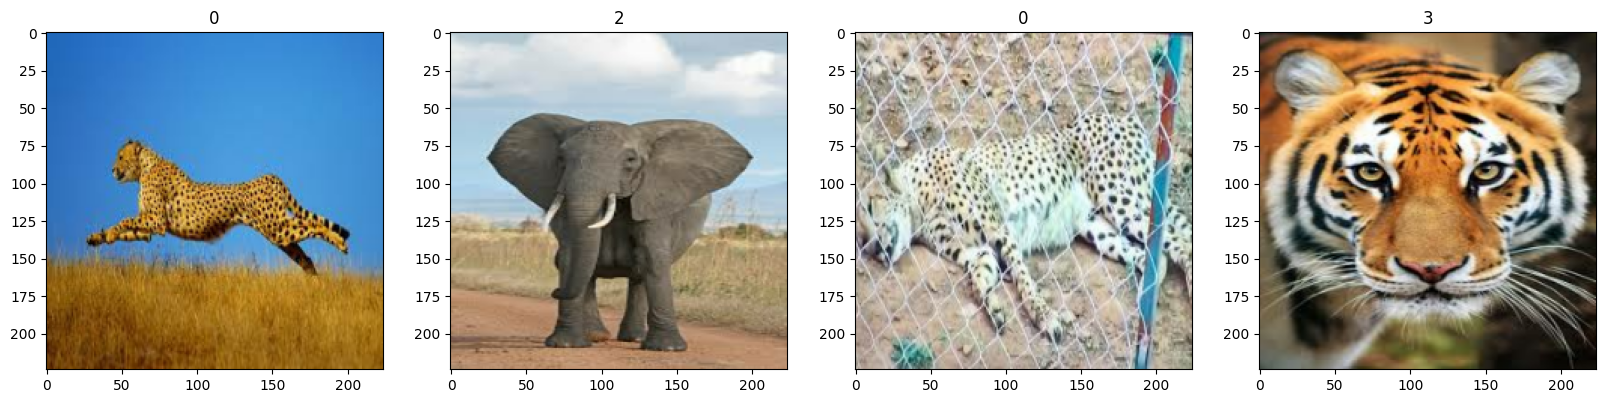

In [165]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [166]:
# Normalization function
normalize = lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)

# Applying the normalization to the dataset
normalized_data = data.map(normalize)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [169]:
total_size = len(list(normalized_data))
train_size = int(0.7 * total_size)   # 70% for training
val_size = int(0.15 * total_size)    # 15% for validation
test_size = total_size - train_size - val_size  # 15% for testing

# Shuffling the dataset before splitting
normalized_data = normalized_data.shuffle(buffer_size=total_size)

# Splitting the dataset
train_data = normalized_data.take(train_size)
remaining_data = normalized_data.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

# Batches from the datasets
# batch_size = 32
# train_data = train_data.batch(batch_size)
# val_data = val_data.batch(batch_size)
# test_data = test_data.batch(batch_size)

# Prefetching to improve performance
# train_data = train_data.prefetch(tf.data.AUTOTUNE)
# val_data = val_data.prefetch(tf.data.AUTOTUNE)
# test_data = test_data.prefetch(tf.data.AUTOTUNE)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [171]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected (Dense) Layer 1
model.add(Dense(512, activation='relu'))

# Dropout layer for regularization
model.add(Dropout(0.5))

# Fully Connected (Dense) Layer 2
model.add(Dense(256, activation='relu'))

# Output layer with softmax activation
model.add(Dense(4, activation='softmax'))


**Q.6** Compile your model

In [172]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [173]:
model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)


Epoch 1/15
36/36 [==============================] - 36s 449ms/step - loss: 1.7339 - accuracy: 0.2967 - val_loss: 1.3207 - val_accuracy: 0.3761
Epoch 2/15
36/36 [==============================] - 27s 420ms/step - loss: 1.2846 - accuracy: 0.4311 - val_loss: 1.2379 - val_accuracy: 0.4554
Epoch 3/15
36/36 [==============================] - 27s 413ms/step - loss: 1.1426 - accuracy: 0.5140 - val_loss: 0.9887 - val_accuracy: 0.6376
Epoch 4/15
36/36 [==============================] - 27s 408ms/step - loss: 1.0027 - accuracy: 0.5689 - val_loss: 0.8088 - val_accuracy: 0.6927
Epoch 5/15
36/36 [==============================] - 27s 417ms/step - loss: 0.8892 - accuracy: 0.6387 - val_loss: 0.6392 - val_accuracy: 0.7723
Epoch 6/15
36/36 [==============================] - 27s 413ms/step - loss: 0.6522 - accuracy: 0.7714 - val_loss: 0.4297 - val_accuracy: 0.8527
Epoch 7/15
36/36 [==============================] - 27s 416ms/step - loss: 0.4805 - accuracy: 0.8272 - val_loss: 0.4081 - val_accuracy: 0.8616

**Q.8** Test your code with test set

In [175]:
loss, accuracy = model.evaluate(test_data)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


9/9 [==============================] - 13s 22ms/step - loss: 0.0285 - accuracy: 0.9929
Test Loss: 0.0285
Test Accuracy: 0.9929


In [176]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9929078221321106


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**